<a href="https://colab.research.google.com/github/akhavan12/discrete_covid_model/blob/master/Math_Model_Draft_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [0]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.

H0 = 1
E0 = .01 
A0 = 0
M0 = 0
W0 = 0
V0 = 0
R0 = 0
D0 = 0

# Everyone else, S0, is susceptible to infection initially.
H0 = N - A0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

In [0]:
def deriv(y, t, N):
  H, E, A, M, W, V, R, D = y
  e =.01 # sym.symbols('epsilon') # delay of exposed to infections
  ## infection rate from M and A
  q_a =0.01# sym.symbols('q_a') # infection rate of the Asymptomatic
  q_m = 0.1 #sym.symbols('q_m') # infection rate of the Mild
  ## recovery rate form a, m , w, v
  R_a = 0.1 #sym.symbols('gamma_a') 
  R_m = 0.1 #sym.symbols('gamma_mild')
  R_w = 0.1 #sym.symbols('gamma_w')
  R_v = 0.1 #sym.symbols('gamma_v')
  ## death rate from w and v
  eta_w = 0.1 #sym.symbols('eta_w')
  eta_v = 0.1 #sym.symbols('eta_v') 
  ## Bilinear incidence (infected cases, transmitting the virus)
  B = 0.1  #sym.symbols('beta') 
  ## moving from 1 state to another
  G_a = .1 #sym.symbols('omega_a')
  G_m = 0.1  #sym.symbols('omega_m')
  G_w = 0.1 #sym.symbols('omega_w')
  G_v = 0.1 #sym.symbols('omega_v')

  dHdt =  -B*H*(A+M+W)
  dEdt =  B*H*(A+M+W) - (e * E * q_a)
  dAdt =  e * E * q_a - (G_a * A) - (R_a * A)
  dMdt =  G_a * A - (G_m * M) - (R_m * M)
  dWdt =  G_m * M - (G_w * W) - (R_w * W) - (eta_w * W)
  dVdt =  G_w * W - (R_v * V) - (eta_v * V)
  dRdt =  R_v * A + R_m * M + R_w * W + R_v* V          
  dDdt =  (eta_w * W) + (eta_v * V)

  return dHdt, dEdt, dAdt, dMdt, dWdt, dVdt, dRdt, dDdt

In [0]:
y0 = H0, E0, A0, M0, W0, V0, R0, D0

ret = odeint(deriv, y0, t,args=(N,))#, args=(N, beta, gamma))
H, E, A, M, W, V, R, D = ret.T

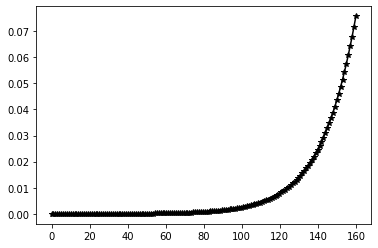

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(t, H/1000, color='blue', label='Susceptible')
#ax.plot(t, M/1000, color='yellow', label='Mild')
#ax.plot(t, W/1000, color='Orange', label='Severe')
#ax.plot(t, V/1000, color='red', label='Ventilator')
#ax.plot(t, R/1000,'.-', color='green',  label='Recovered')
#ax.plot(t, D/1000 , color='black', label='Dead')
ax.plot(t, E/1000,'*-' , color='black',label='Exposed')